# Examining how geospatial data can help improve predicting housing prices
Group 9 - Julius Løve Fischer, Hans Chirstian Jul Lehmann & Kerem Yapici

## Importing packages and unzipping data from boliga.dk

In [1]:
import pandas as pd
import numpy as np
from numpy import NaN
#import requests
from datetime import date
#import time
#import math
#import os
#import ast
#import json
import matplotlib.pyplot as plt
#import tqdm
import seaborn as sns
#import folium
#import geopandas as gpd
#import fiona
#from shapely.geometry import Point
%matplotlib inline

In [ ]:
# Saving the merged file - will use this from now on
path = r'C:\Users\Kerem\Desktop'

boliga.to_csv(path +'/boliga.csv')

In [2]:
boliga = pd.read_csv(r'C:\Users\Kerem\Desktop' + '/boliga.csv')

In [3]:
pd.set_option('display.max_columns', None)

# getting a overview of data
boliga.describe()

# Column type
boliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88786 entries, 0 to 88785
Data columns (total 86 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          88786 non-null  int64  
 1   address                             88786 non-null  object 
 2   zipCode                             88786 non-null  int64  
 3   price                               88786 non-null  int64  
 4   propertyType                        88786 non-null  int64  
 5   saleType                            88786 non-null  object 
 6   sqmPrice                            88786 non-null  float64
 7   rooms                               88786 non-null  float64
 8   size                                88786 non-null  int64  
 9   buildYear                           88786 non-null  int64  
 10  latitude                            88786 non-null  float64
 11  longitude                           88786

## Data cleaning

In [4]:
# converting column types automatically
boliga.convert_dtypes().dtypes

# removing duplicate columns
boliga = boliga.drop(columns=['heatingCode.1', 'notes.1', 'roomsQuantity.1']).copy()


In [5]:
pd.set_option('display.max_rows', 100)
# replacing '-' with np.NaN
boliga.replace('-', np.NaN, inplace=True)

# This way, we can count the number of missing values per column;
boliga.isnull().sum() 

# addressFloor has 14417 missings

# as a share of total
share = boliga.isnull().sum(axis=0) * 100 / len(boliga)

# dropping columns with NaN share of >=20%
list = ['Unnamed: 0', 'conservationCode', 'conservationWorthy', 'drainCode', 'drainPermission', 'heatingCode', 
        'additionalHeatingSupplyCode', 'additionalOuterWallMaterial', 'additionalRoofMaterial', 'asbestosMaterial', 
        'energyCode', 'heatingInstallationCode', 'heatingSecondaryCode', 'usageCode']

#other non-relevant columns
non_relevant = ['accessAreaArea', 'area', 'areaBusiness','areaClosedCovered','areaLiving','areaOpenCovered','areaOther',
'areaRecorded', 'appliance', 'areaSocial', 'areaUnit','basementSize','buildInCarportArea','buildInGarageArea','buildingArea',
'buildingNumber', 'buildingUsage','buildInOuthouseArea','businessArea','carbageRoomArea','closedCoveredArea',
'conservatoryArea', 'constructionYear', 'coveredArea','floorDeviation','floorQuantity','livingArea','notes','objectStatus','openCoveredArea',
'otherArea','propertyCondemned', 'propertyUnitType', 'roomsBusinessQuantity','secureRoomArea','toiletCode']


# extending list with non-relevant
list.extend(non_relevant)

# dropping lists
boliga = boliga.drop(columns=list)

## Outliers

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
boliga[['sqmPrice']].describe()

print(boliga[['sqmPrice']].describe().to_latex(index=True))

\begin{tabular}{lr}
\toprule
{} &   sqmPrice \\
\midrule
count &   88786.00 \\
mean  &   89425.83 \\
std   &  221918.53 \\
min   &     158.73 \\
25\%   &   28455.28 \\
50\%   &   39252.34 \\
75\%   &   53333.33 \\
max   & 7744657.50 \\
\bottomrule
\end{tabular}



<function matplotlib.pyplot.show(close=None, block=None)>

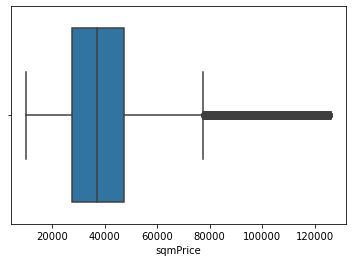

In [7]:
# checking sqmprice
boliga = boliga.loc[(boliga['sqmPrice']<=126000) & (boliga['sqmPrice']>=10000)]

#boliga[['sqmPrice']].describe()

# plotting
sns.boxplot(x=boliga['sqmPrice'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

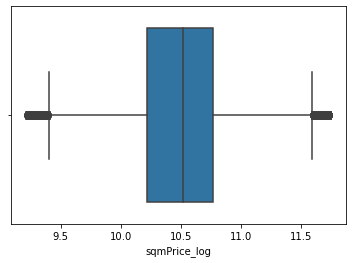

In [8]:
# checking sqmprice
boliga = boliga.loc[(boliga['sqmPrice']<=126000) & (boliga['sqmPrice']>=10000)]

#boliga[['sqmPrice']].describe()

# taking log
boliga['sqmPrice_log'] = np.log(boliga['sqmPrice'])

# plotting
sns.boxplot(x=boliga['sqmPrice_log'])
plt.show

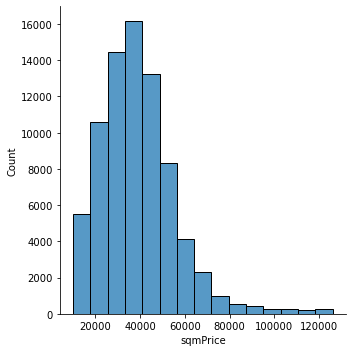

In [9]:
sns.displot(boliga['sqmPrice'], bins = 15, kde= False)
plt.show()

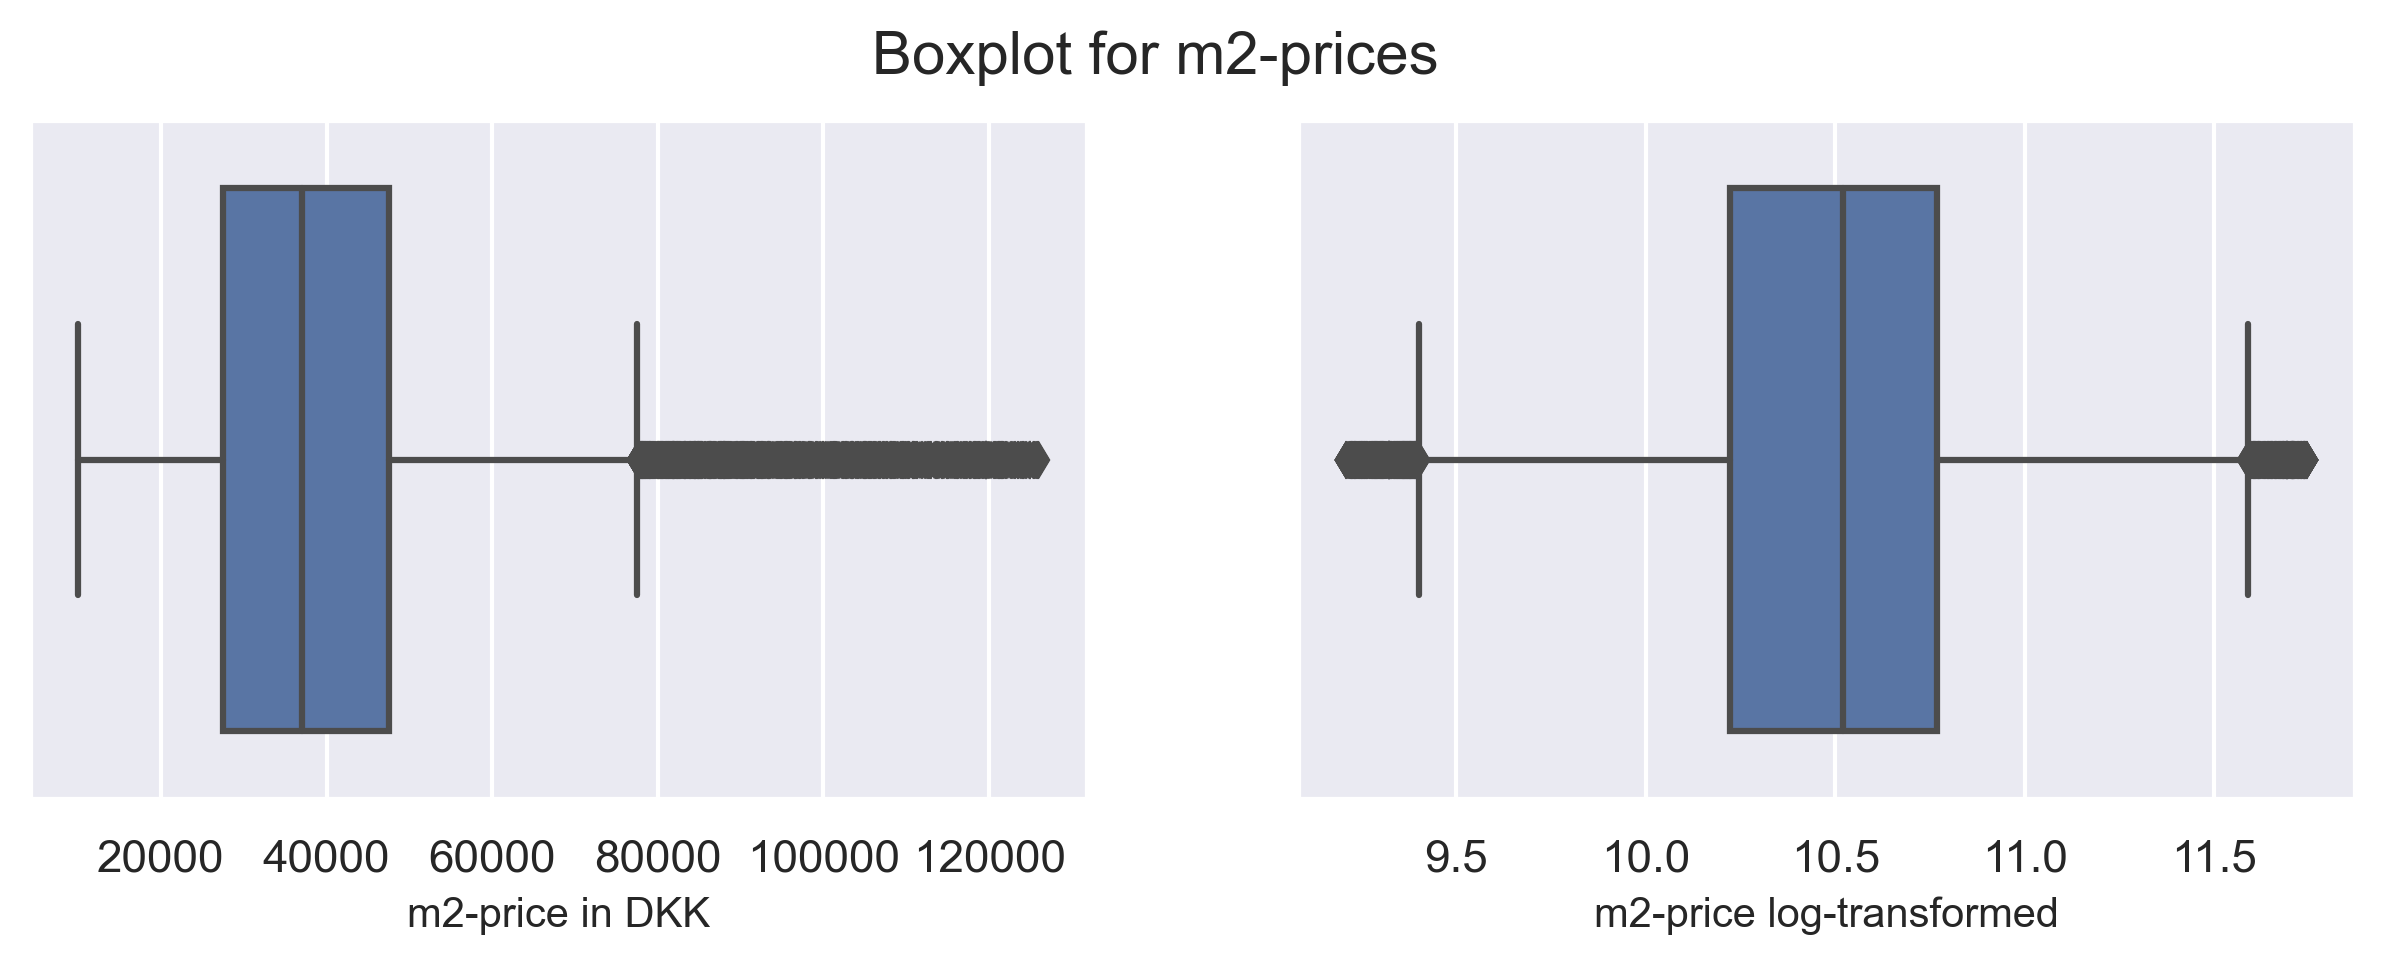

In [13]:
sns.set()
#changing quality for exporting
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# plotting settings
fig, axes = plt.subplots(1, 2, figsize=(10,3))
fig.suptitle('Boxplot for m2-prices')
sns.boxplot(ax=axes[0], x=boliga['sqmPrice']).set_xlabel("m2-price in DKK", fontsize = 10)
sns.boxplot(ax=axes[1], x=boliga['sqmPrice_log']).set_xlabel("m2-price log-transformed", fontsize = 10)

plt.savefig('boxplot_sqmPrices.png', bbox_inches="tight")

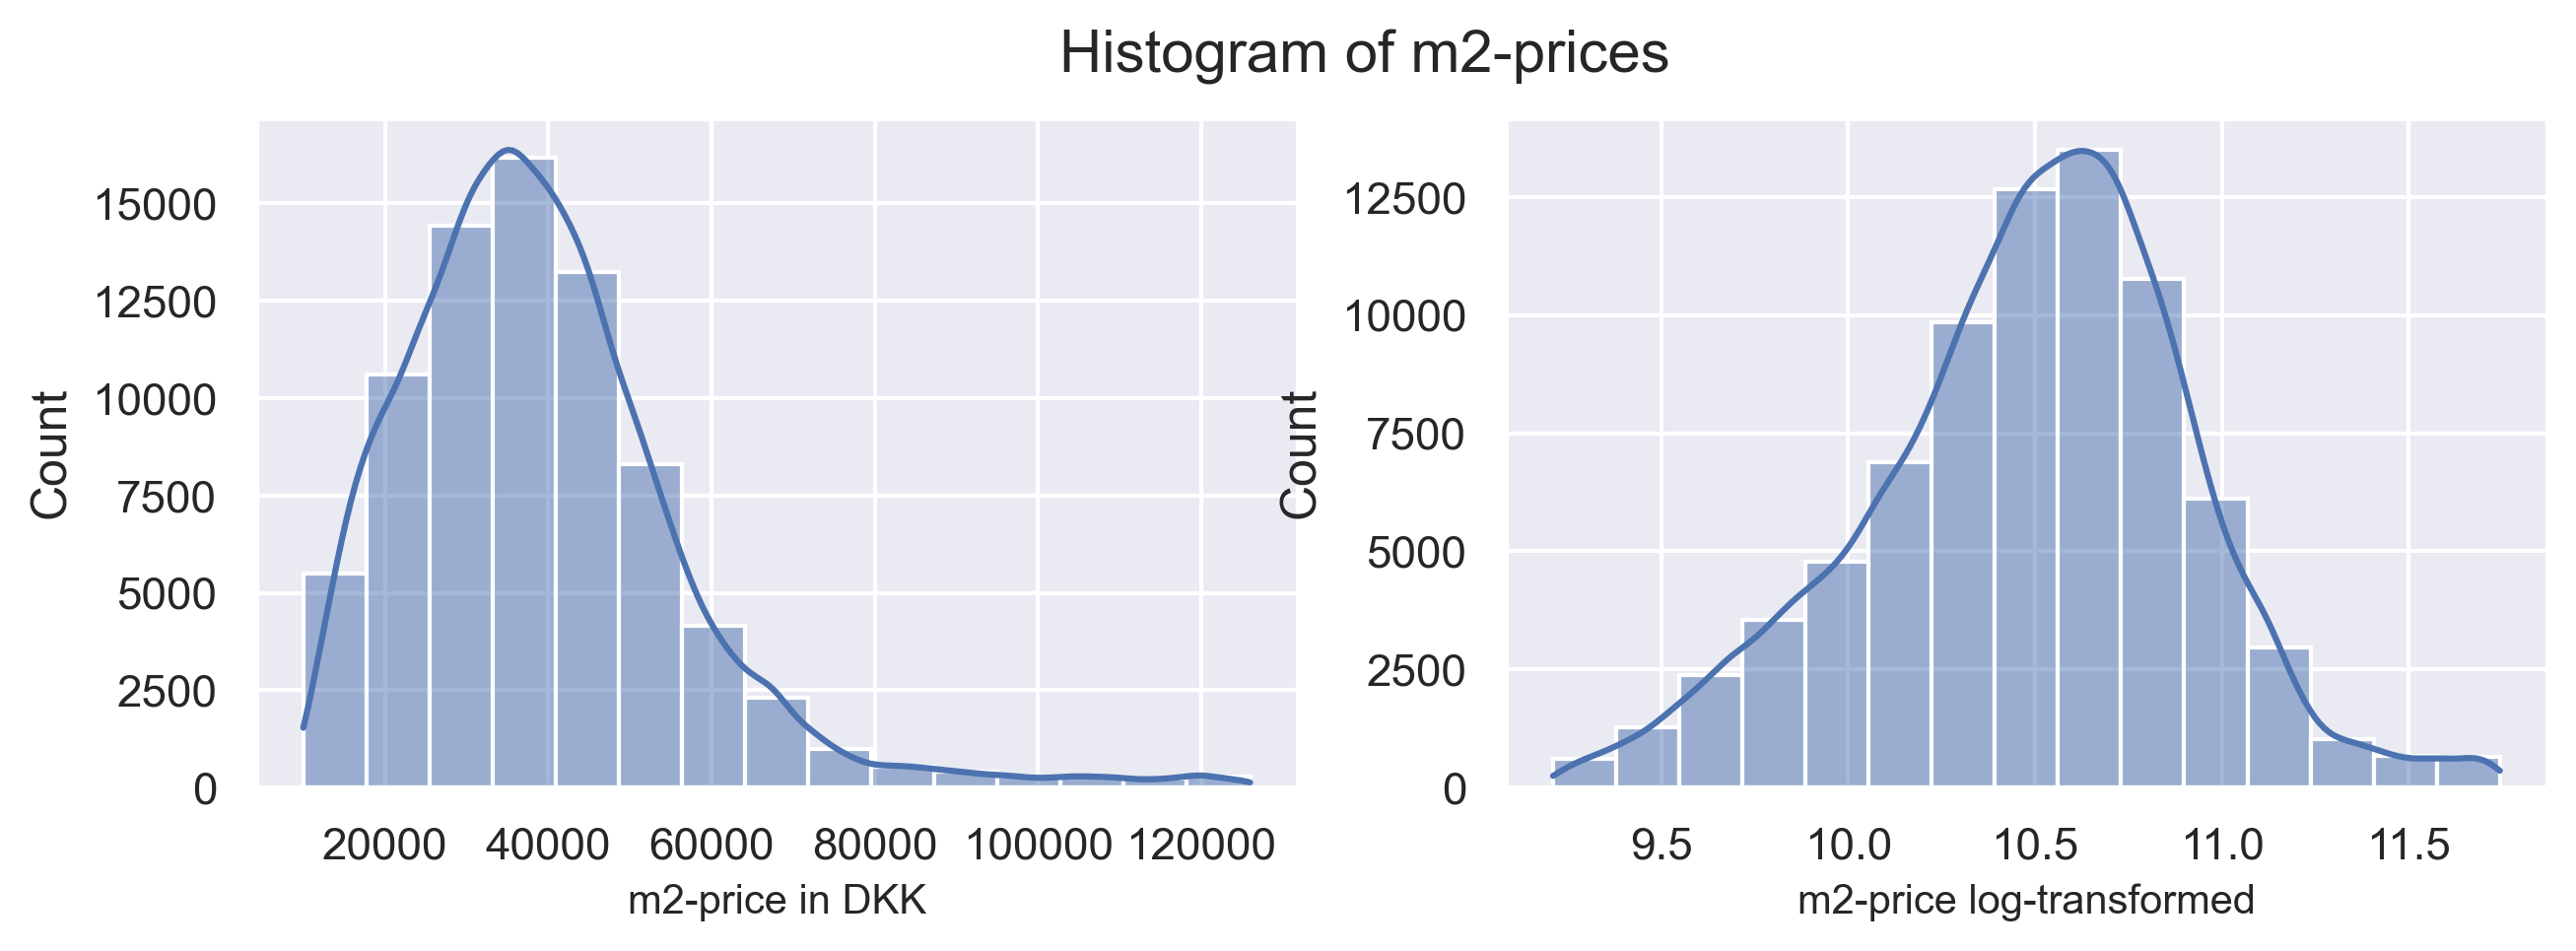

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
fig.suptitle('Histogram of m2-prices')
sns.histplot(ax=ax1, x=boliga['sqmPrice'], bins = 15, kde= True).set_xlabel("m2-price in DKK", fontsize = 10)
sns.histplot(ax=ax2, x=boliga['sqmPrice_log'], bins = 15, kde= True).set_xlabel("m2-price log-transformed", fontsize = 10)

""" sns.histplot(data=dfw.bill_length_mm, kde=True, stat='density', bins=12, ax=ax1)
sns.histplot(data=dfw.bill_depth_mm, kde=True, stat='density', bins=12, ax=ax2)
fig.tight_layout()
plt.show() """

plt.savefig('histplot_sqmPrices.png', bbox_inches="tight" )

In [ ]:

# to detect outliers, bins will be created for sqmPrice variable

np.round(boliga['sqmPrice'].describe(),2)

cuts = np.arange(0,140000, 10000) 
cats = pd.cut(boliga['sqmPrice'], cuts)
cats.value_counts()/boliga['sqmPrice'].count()

## Descriptive analysis

In [ ]:
# Creating density plot over houseprices 
f,ax = plt.subplots(1,2, sharex=True, figsize=(10,4))

### BEGIN SOLUTION
sns.distplot(boliga['price'],hist=True, bins=range(12), ax=ax[0])
ax[0].set(ylabel='Density', xlabel=(None))

sns.distplot(boliga['price'], bins=range(12), hist_kws={'cumulative': True}, kde_kws={'cumulative': True}, ax=ax[1]) 
ax[1].set(ylabel='Cumulative density', xlabel=(None))

sns.despine()

plt.suptitle("Distribution of house prices  in our sample", size=20)
### END SOLUTION

f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("boliga (DKK)")

plt.grid(False)

#sns.set_style('whitegrid')
#sns.kdeplot(np.array(boliga['price']), bw=0.5)

In [ ]:
cuts = np.arange(0, 80, 10) # range from 0 to 100 with 20 between
tb_cat = pd.cut(boliga['total_bill'], cuts) # cut into categorical data
print(tb_cat.value_counts().sort_index())
print(round(tb_cat.value_counts().sort_index()/len(boliga['total_bill'])*100,2))


In [ ]:
sns.set_theme()
